# Check Tensorflow version

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

# Prepare model

## Prepare data

In [2]:
%%bash
cp /content/drive/My\ Drive/test_vae/*.py ./
python download_save_MNIST.py

11493376/11490434 [==============================] - 0s 0us/step
Done.


## Load trained model

In [0]:
%%bash
cp -r /content/drive/My\ Drive/test_vae/weight_0 ./
cp -r /content/drive/My\ Drive/test_vae/weight_3 ./
cp -r /content/drive/My\ Drive/test_vae/weight_10 ./

## Train new model

In [0]:
%%bash
python run_MNIST.py --batch_size 32 --latent_dim 5 --log10_lr -5 --epoch 0 --out weight_0
python run_MNIST.py --batch_size 32 --latent_dim 5 --log10_lr -5 --epoch 3 --out weight_3
python run_MNIST.py --batch_size 32 --latent_dim 5 --log10_lr -5 --epoch 10 --out weight_10

# Visualize result

In [0]:
import os

import numpy as np
import matplotlib.pyplot as plt

from CVAE import CVAE

In [0]:
# params
weight_list = ['weight_0', 'weight_3', 'weight_10']
latent_dim = 5

# load model
model_list = []
for w in weight_list:
    model = CVAE(latent_dim=latent_dim, input_shape=(28,28,1), optimizer=None)
    model.load_weights(os.path.join('./', w, 'weights'))
    model_list.append(model)

# load data
test_X = np.load('MNIST/test_X.npy')
test_Y = np.load('MNIST/test_Y.npy')

In [0]:
# sample
num_sample = 5
index = np.random.choice(range(test_X.shape[0]), size=num_sample, replace=False)
X = test_X[index, ..., np.newaxis].astype('float32')
y = test_Y[index]

# reconstruct
X_recon_list = []
for model in model_list:
    params = model.encode(X)
    z = model.reparameterize(*params)
    X_recon = model.decode(z)
    X_recon_list.append(X_recon)

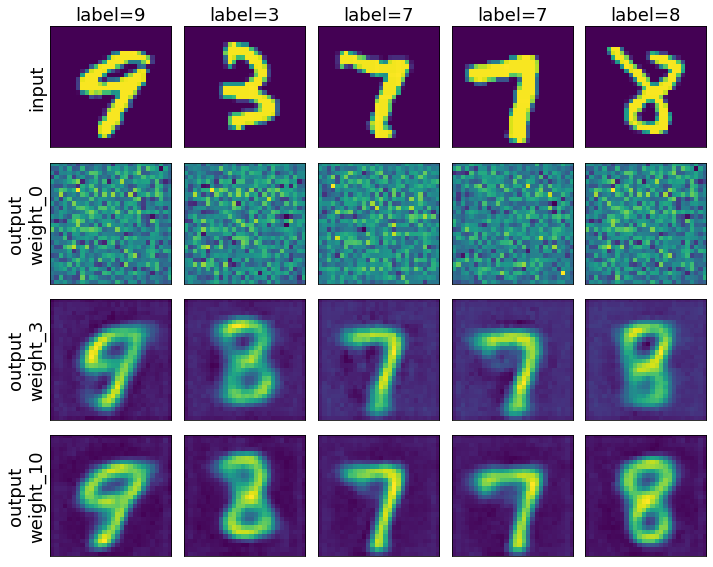

In [13]:
# plot params
width = 10
fs = 18

# plot
nc = num_sample
nr = 1+len(X_recon_list)
height = width/nc*nr

fig, axes = plt.subplots(ncols=nc, nrows=nr, sharex=True, sharey=True, figsize=(width, height))

for i in range(num_sample):
    axes[0, i].imshow(X[i, ..., 0])
    axes[0, i].set_title('label={}'.format(y[i]), fontsize=fs)
    for j in range(1, nr):
        axes[j, i].imshow(X_recon_list[j-1][i, ..., 0])
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

axes[0, 0].set_ylabel('input', fontsize=fs)
for j in range(1, nr):
    axes[j, 0].set_ylabel('output\n{}'.format(weight_list[j-1]), fontsize=fs)

fig.tight_layout()
plt.show()